# **Drug Side Effects Classification using Machine Learning**

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

In [2]:
data = pd.read_csv(r"/content/drive/MyDrive/drug_dataset.csv")



## **Data Understanding**

In [3]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


 **Description of columns in the dataset**

Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 5-Star rating on the ease of use of drug

Effectiveness : Patient's 5-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 5-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

In [4]:
data.shape

(362806, 12)

In [5]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


Numerical Columns:

- 'DrugID' is an integer datatype column representing unique identifiers.

- 'EaseofUse', 'Effectiveness' and 'Satisfaction' are integer datatype columns with a 5-star rating.

In [7]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


#### **Name and race column addition**

Mimesis is a robust data generator for Python, capable of rapidly producing large volumes of synthetic data for various use cases.

In [8]:
pip install mimesis

Giving random names to each users using the library 'mimesis'

In [9]:
from mimesis import Person
person = Person('en')

name = []
for i in range(0,362806):
  name.append(person.name())

data['Name'] = name

#Positioning the 'Name' column as zeroth column
col1 = data.pop('Name')
data.insert(0, col1.name, col1)

data.head()

,Name,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Stan,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Diamond,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Brock,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Maynard,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Roselee,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


Randomly selecting races for each users.

In [10]:
import random

race = ["White", "Hispanic", "Black", "Asian", "Australoid"]
words = random.choices(race, k = 362806)

data['Race'] = words

#Positioning the 'Race' column as first column
col2 = data.pop('Race')
data.insert(1, col2.name, col2)

data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Stan,Australoid,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Diamond,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Brock,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Maynard,Australoid,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Roselee,Asian,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


#### **Year Column**

In [11]:
#Create a new colum 'Year' in which the year from date is given
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x:x.year)

### **The DrugId 6873 represents the drugs 'lisinopril' and 'lisinopril solution'. It can be selected to build a classification model to determine side effects**

In [12]:
data2 = data[data.DrugId == 6873].reset_index()
data2.head()

,index,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
0,9197,Luci,Hispanic,,High Blood Pressure,2020-02-29,lisinopril solution,6873,5,5,No Script or health Insurance needed to place ...,5,,"Dizziness , lightheadedness , tiredness, or ...",14,2020
1,9203,Keva,Australoid,75 or over,High Blood Pressure,2020-02-08,lisinopril solution,6873,5,4,I have developed a very itch rash on my body f...,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3,2020
2,9209,Clayton,Australoid,55-64,High Blood Pressure,2020-01-14,lisinopril solution,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,Male,"Dizziness , lightheadedness , tiredness, or ...",3,2020
3,9215,Tanner,Asian,65-74,High Blood Pressure,2019-10-17,lisinopril solution,6873,5,5,Have been taking 10 mg doses per day for over ...,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6,2019
4,9221,Dudley,Asian,55-64,High Blood Pressure,2019-10-13,lisinopril solution,6873,2,4,I don't like that I'm taking this and not know...,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12,2019


In [13]:
data2.shape

(8538, 16)

#### **Missing Values**

In [14]:
data2.isna().sum()

index            0
Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          4
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
Year             0
dtype: int64

In [15]:
#Handling instances with whitespaces
for i in data2.columns:
  for j in data2.loc[data2[i] == " "].index:
    data2.loc[j,i] = np.NaN

data2.isna().sum()

index               0
Name                0
Race                0
Age               270
Condition           0
Date                0
Drug                0
DrugId              0
EaseofUse           0
Effectiveness       0
Reviews          1566
Satisfaction        0
Sex               494
Sides               0
UsefulCount         0
Year                0
dtype: int64

#### **New Feature creation: Sideeffect**

In [16]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
data2['Sideeffect'] = data2['Satisfaction'].map(mapping)

The values in the column 'Sideeffect' are as follows:

- 5 suggests extreme level sideeffect
- 4 suggests high level sideeffect
- 3 suggests medium level sideeffect
- 2 suggests moderate level sideeffect
- 1 suggests very slight level sideeffect

In [17]:
data2.head()

,index,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year,Sideeffect
0,9197,Luci,Hispanic,NaN,High Blood Pressure,2020-02-29,lisinopril solution,6873,5,5,No Script or health Insurance needed to place ...,5,NaN,"Dizziness , lightheadedness , tiredness, or ...",14,2020,1
1,9203,Keva,Australoid,75 or over,High Blood Pressure,2020-02-08,lisinopril solution,6873,5,4,I have developed a very itch rash on my body f...,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3,2020,2
2,9209,Clayton,Australoid,55-64,High Blood Pressure,2020-01-14,lisinopril solution,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,Male,"Dizziness , lightheadedness , tiredness, or ...",3,2020,2
3,9215,Tanner,Asian,65-74,High Blood Pressure,2019-10-17,lisinopril solution,6873,5,5,Have been taking 10 mg doses per day for over ...,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6,2019,1
4,9221,Dudley,Asian,55-64,High Blood Pressure,2019-10-13,lisinopril solution,6873,2,4,I don't like that I'm taking this and not know...,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12,2019,4


## **Exploratory Data Analysis**

### **EDA in main dataset**

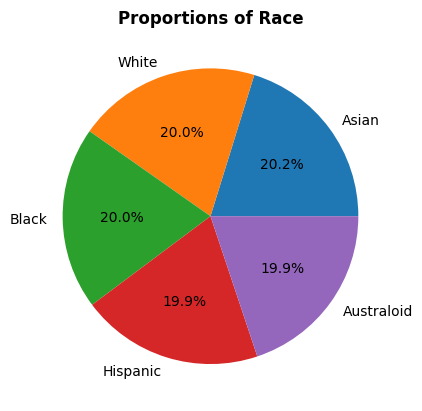

In [18]:
#Distribution of Age
co = data['Race'].value_counts()
plt.pie(co, labels = co.index, autopct = '%0.1f%%')
plt.title('Proportions of Race', weight = 'bold')
plt.show()

All the 5 races are about in same number of proportions.

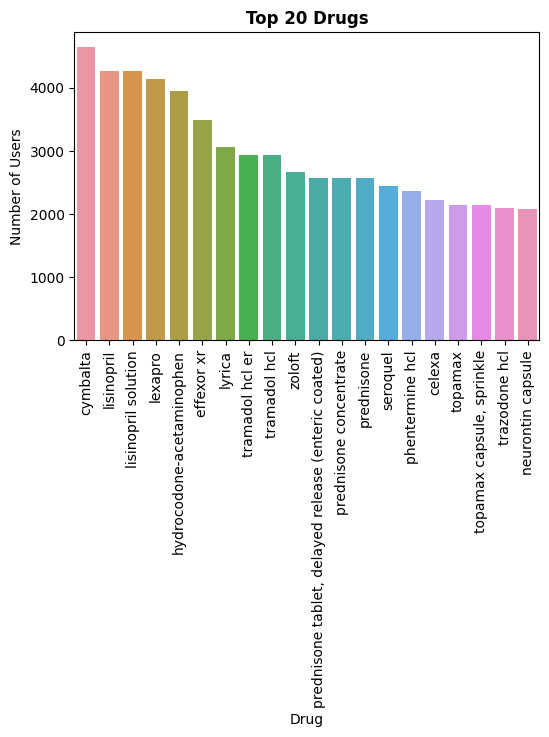

In [19]:
#Top 20 Drugs based on No. of Users
plt.figure(figsize = (6,4))
d = data['Drug'].value_counts().head(20).reset_index()
d.columns = ['Drug', 'Number of Users']
sns.barplot(data = d, x = 'Drug', y = 'Number of Users')
plt.title("Top 20 Drugs", weight = 'bold')
plt.xticks(rotation=90)
plt.show()

- The drug that is used by the greatest number of users is 'cymbalta', followed by 'lisinopril' and 'lisinopril solution'.

- Each of these 20 drugs has more than 2000 users.  

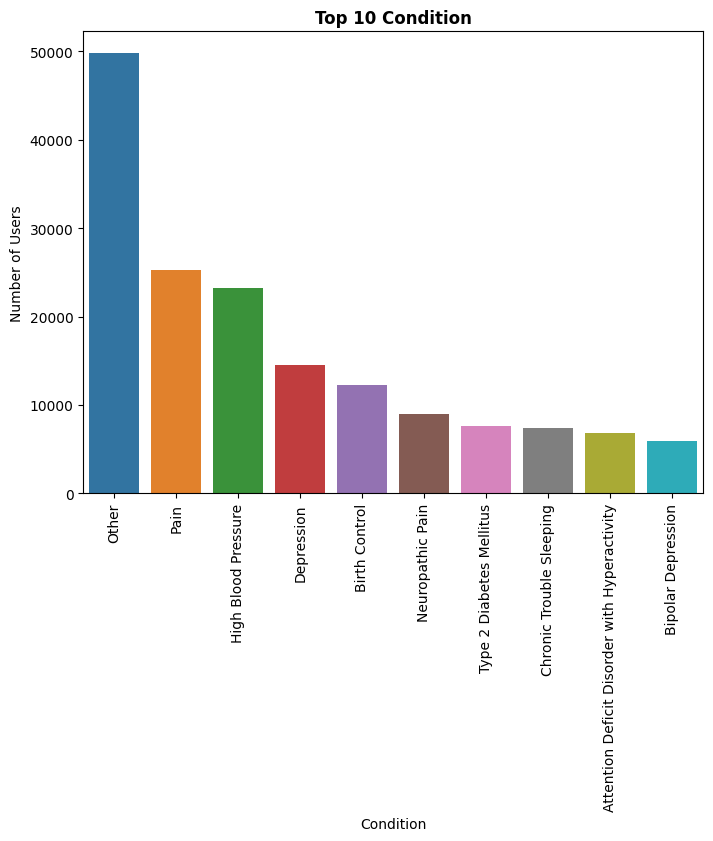

In [20]:
#Top 10 Conditions based on No. of Users

d1 = data['Condition'].value_counts().head(10).reset_index()
d1.columns = ['Condition', 'Number of Users']
plt.figure(figsize = (8,6))
sns.barplot(data = d1, x = 'Condition', y = 'Number of Users')
plt.title("Top 10 Condition", weight = 'bold')
plt.xticks(rotation=90)
plt.show()

Almost 50000 users bought drugs for other condition, while only about 25000 people have taken drugs for 'Pain' which is second in the list.

### **EDA in second dataset(data2)**

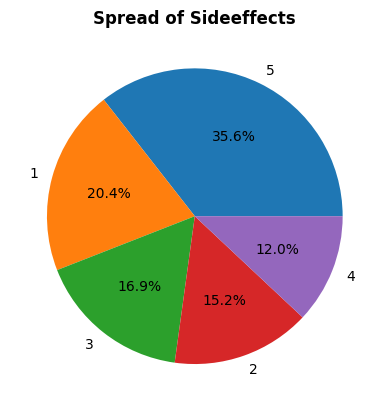

In [21]:
co = data2['Sideeffect'].value_counts()
plt.pie(co, labels = co.index, autopct = '%0.1f%%')
plt.title('Spread of Sideeffects', weight = 'bold')
plt.show()

Inference:

- More than one-third of the users encountered extremely high side effects from the drug(rating 5).

- Only about a fifth of the total patients suggested that they experienced very little sideeffects(rating 1).

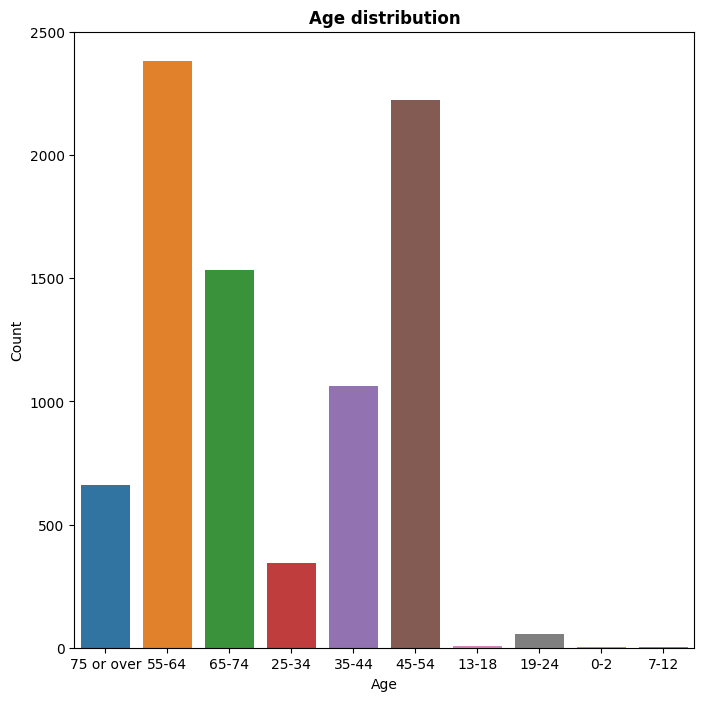

In [22]:
#Distribution of Age
plt.figure(figsize = (8,8))
sns.countplot(data = data2, x = 'Age')
plt.title("Age distribution", weight = 'bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Inference

- The patients between age 55-64 use the drug 'lisinopril' the most, followed by the patients of age between 45-54 and 65-74. This shows that middle agers ingest more drugs than any others.

- The children and young people below the age 25 are the ones who used the drug least.

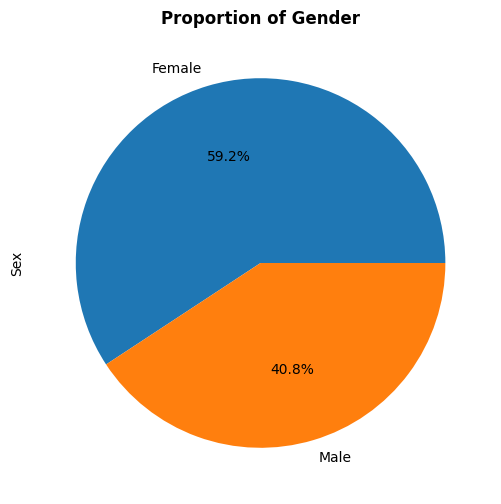

In [23]:
plt.figure(figsize=(6,6))
data2['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Gender', weight = 'bold')
plt.show()

The females, who are about three-fifth of the total 'lisinopril' users, consume the drug more than their male counterparts.

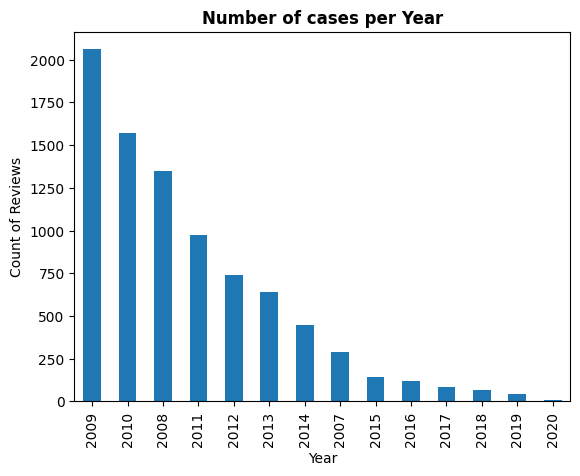

In [24]:
data2['Year'].value_counts().plot(kind='bar')
plt.title("Number of cases per Year", weight = 'bold')
plt.xlabel("Year")
plt.ylabel("Count of Reviews")
plt.show()

Most of the cases reported were in 2009, the year in which more than 2000 users used the drug 'lisinopril'.

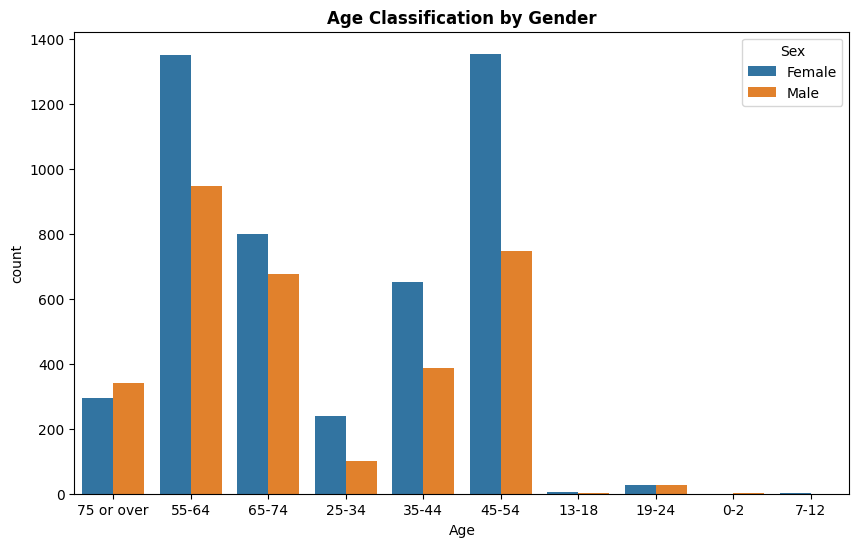

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Age', hue = 'Sex', data = data2)
plt.title("Age Classification by Gender", weight = 'bold')
plt.show()

Inference:

- Females uses the drug more than males in most of the age groups.

- The age groups where the male group dominates slightly are in infants(age 0-2) and in old people of age over 75.

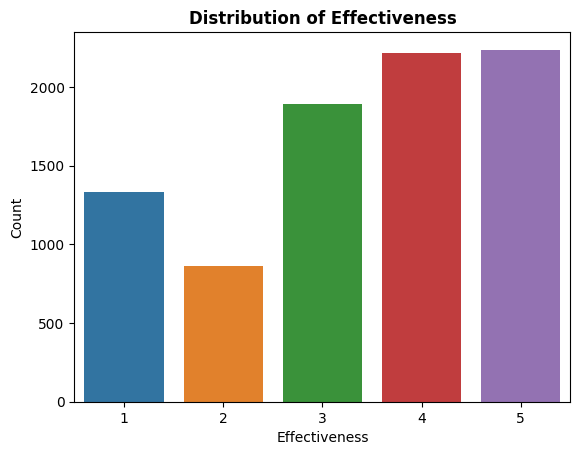

In [26]:
#distribution of effectiveness
sns.countplot(x = data2['Effectiveness'])
plt.title("Distribution of Effectiveness", weight = 'bold')
plt.ylabel('Count')
plt.show()

Most users voted a rating more than 3 which implies that the drug is fairly effective.

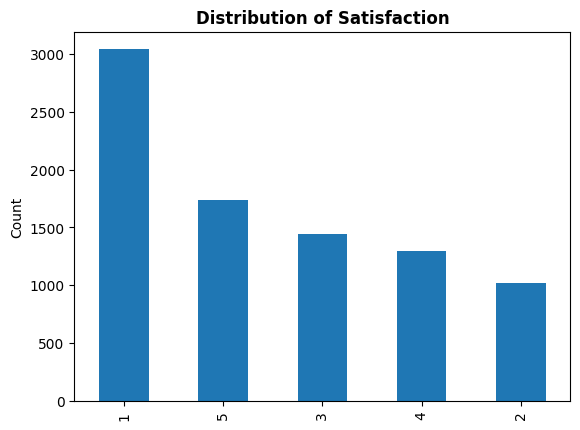

In [27]:
#distribution of satisfaction
data2['Satisfaction'].value_counts().plot(kind='bar')
plt.title("Distribution of Satisfaction", weight = 'bold')
plt.ylabel("Count")
plt.show()

Inference:

- A large range of people(more than 3000) were unsatisfied with the drug as the users rated 1 more than any other rating in satifaction section.

- Only less than 3500 users who have taken the drug 'lisinopril' were satisfied with the drug(rating 4 and 5).

<Figure size 1000x800 with 0 Axes>

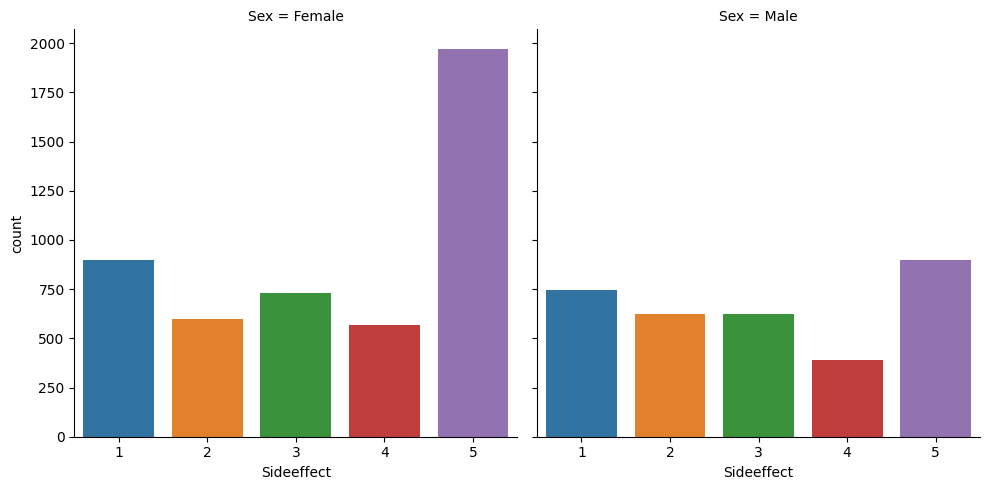

In [28]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Sideeffect",col="Sex",
                data=data2, kind="count");
plt.show()


*   The females faced more extreme sideeffects than the males.
*   About 2000 female users encountered acute sideeffects from the drug, which suggests that there are adverse reactions caused by the drug 'lisinopril' to most of the women.
*   There are mixed sideeffects in the males caused by the drug.

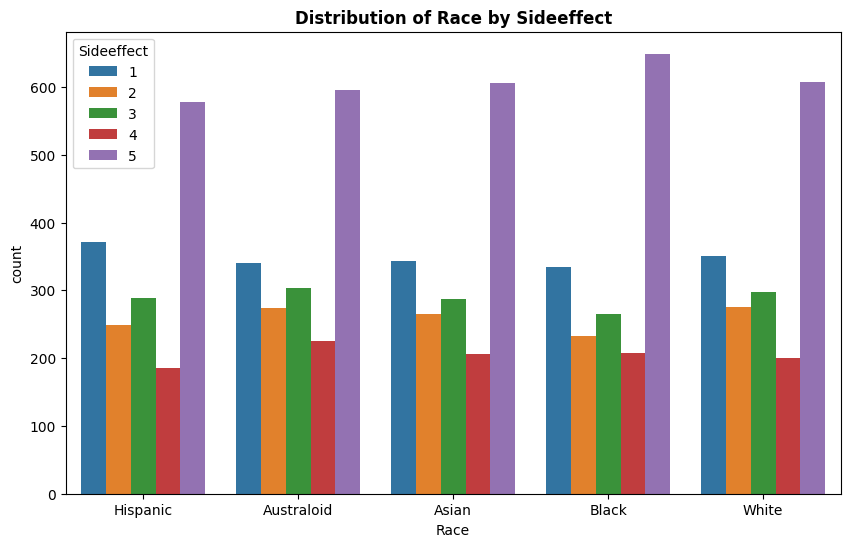

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Race', hue = 'Sideeffect', data = data2)
plt.title('Distribution of Race by Sideeffect', weight='bold')
plt.show()

*   People in all the races experienced extreme drug reactions.

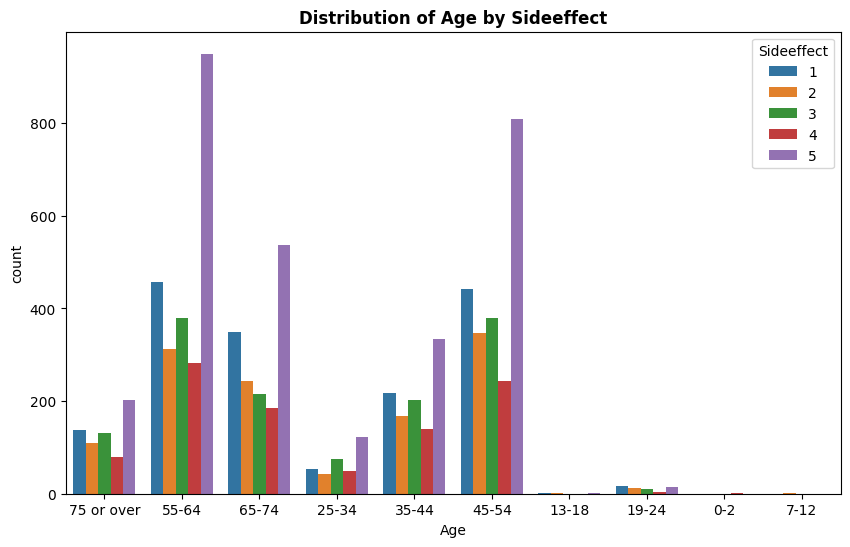

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Age', hue = 'Sideeffect', data = data2)
plt.title('Distribution of Age by Sideeffect', weight='bold')
plt.show()

*   The users between the age 55-64 experienced more adverse reactions from the drug than any other age groups


## **Data Preprocessing**

In [31]:
data2.columns

Index(['index', 'Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year', 'Sideeffect'],
      dtype='object')

#### **Duplicates**

In [32]:
# Checking for duplicates in the DataFrame
duplicate_rows = data2[data2.duplicated()]

# If there are duplicates, print the number of duplicate rows
if not duplicate_rows.empty:
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
else:
    print("No duplicates found in the DataFrame.")

# Remove duplicates from the DataFrame
data2.drop_duplicates(inplace=True)

# Print the new shape of the DataFrame after removing duplicates
print("\n")
print("Shape after removing duplicates:", data2.shape)


No duplicates found in the DataFrame.


Shape after removing duplicates: (8538, 17)


#### **Feature Selection**

In [33]:
#dropping unnecessary columns from the drug dataset
data2.drop(['index', 'Name', 'Race', 'Condition', 'Date', 'Drug', 'DrugId', 'Reviews', 'Satisfaction', 'Sides'], axis = 1, inplace = True)
data2.shape

(8538, 7)

Columns that were not relevant or informative for classifying drug sideeffects were dropped to simplify the dataset and eliminate noise.

This reduced the column count to 6, focusing only on the essential features for the analysis.

In [34]:
data2.head()

,Age,EaseofUse,Effectiveness,Sex,UsefulCount,Year,Sideeffect
0,NaN,5,5,NaN,14,2020,1
1,75 or over,5,4,Female,3,2020,2
2,55-64,4,5,Male,3,2020,2
3,65-74,5,5,Male,6,2019,1
4,55-64,2,4,Male,12,2019,4


#### **Handling Missing Values**


In [35]:
data2.isna().sum()

Age              270
EaseofUse          0
Effectiveness      0
Sex              494
UsefulCount        0
Year               0
Sideeffect         0
dtype: int64

- To handle missing values, appropriate techniques such as imputation or removal can be applied based on the drug characteristics and the impact of missing values on the analysis.

In [36]:
data2.Age.unique()

array([nan, '75 or over', '55-64', '65-74', '25-34', '35-44', '45-54',
       '13-18', '19-24', '0-2', '7-12'], dtype=object)

Randomly filling the missing values in the column 'Age'.

In [37]:
# Handling missing values in 'Age' column
age = ['75 or over', '55-64', '65-74', '25-34', '35-44', '45-54', '13-18', '19-24', '0-2', '7-12']

for i in data2.loc[data2['Age'].isna()].index:
  data2.iloc[i, 0] = random.choices(age)[0]

In [38]:
data2.Sex.unique()

array([nan, 'Female', 'Male'], dtype=object)

Randomly filling the missing values in the column 'Sex'.

In [39]:
# Handling missing values in 'Sex' column
gender = ['Female', 'Male']

for i in data2.loc[data2['Sex'].isna()].index:
  data2.iloc[i, 3] = random.choices(gender)[0]

In [40]:
# Remove rows with any missing values from the selected drug dataset(if any)
data2.dropna(axis = 0, inplace = True)

In [41]:
data2.isna().sum()

Age              0
EaseofUse        0
Effectiveness    0
Sex              0
UsefulCount      0
Year             0
Sideeffect       0
dtype: int64

In [42]:
data2.shape

(8538, 7)

#### **Conversion of 'Age' Column**

In [43]:
#preprocess 'age' column to convert age groups to numerical values
def preprocess_age(age_group):
    if pd.notnull(age_group):
        if isinstance(age_group, float):
            return age_group
        elif isinstance(age_group, str):
            if age_group.startswith('75'):
               age_range = age_group.split(' ')
               return int(age_range[0]) + 4
            else:
                age_range = age_group.split('-')
                return (int(age_range[0]) + int(age_range[1])) / 2
    return age_group

data2['Age'] = data2['Age'].apply(preprocess_age)

: The code converts age groups represented as strings into numerical values.

: If the age group is already a float, it remains unchanged.

: Age groups represented as strings are further processed:

- Age groups starting with '75' are converted to an approximate upper bound age of 79.
- Age range (e.g., '25-34') is converted to the average of lower and upper bounds.

: The outcome is the 'age' column with numerical values for age groups suitable for analysis and modeling.


In [44]:
data2.Age.unique()

array([39.5, 79. , 59.5, 69.5, 29.5, 49.5, 15.5, 21.5,  1. ,  9.5])

#### **Encoding**

In [45]:
# One hot Encoding
data3 = pd.get_dummies(data2)

In [46]:
data3.head()

,Age,EaseofUse,Effectiveness,UsefulCount,Year,Sideeffect,Sex_Female,Sex_Male
0,39.5,5,5,14,2020,1,1,0
1,79.0,5,4,3,2020,2,1,0
2,59.5,4,5,3,2020,2,0,1
3,69.5,5,5,6,2019,1,0,1
4,59.5,2,4,12,2019,4,0,1


#### **Data Scaling (Normalization)**

In [47]:
data2.columns

Index(['Age', 'EaseofUse', 'Effectiveness', 'Sex', 'UsefulCount', 'Year',
       'Sideeffect'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns that need to be normalized
numerical_columns = ['Age', 'EaseofUse', 'Effectiveness', 'UsefulCount']

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the selected numerical columns
data3[numerical_columns] = scaler.fit_transform(data3[numerical_columns])

In [49]:
data3.head()

,Age,EaseofUse,Effectiveness,UsefulCount,Year,Sideeffect,Sex_Female,Sex_Male
0,-1.152546,0.788833,1.184087,0.971832,2020,1,1,0
1,1.695325,0.788833,0.457709,-0.502970,2020,2,1,0
2,0.289414,0.013619,1.184087,-0.502970,2020,2,0,1
3,1.010394,0.788833,1.184087,-0.100751,2019,1,0,1
4,0.289414,-1.536808,0.457709,0.703687,2019,4,0,1


## **Modelling**

In [50]:
# 'Status' is the target variable
x = data3.drop('Sideeffect', axis=1)
y = data3['Sideeffect']

In [51]:
#splitting dataset into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### **Logistic Regression**

In [52]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()

In [53]:
logic.fit(x_train, y_train)
y_lr = logic.predict(x_test)

print(accuracy_score(y_test, y_lr))
print(confusion_matrix(y_test, y_lr))

0.6124121779859485
[[285  29   9   0   8]
 [ 52 129  58   0  22]
 [ 36  38 110   1 101]
 [ 17  18  55   2 124]
 [ 38   4  47   5 520]]


### **K Nearest Neighbor**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

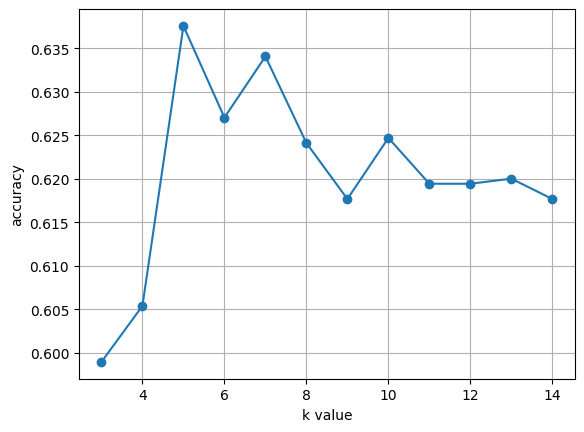

In [55]:
metric = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred_knn)
    metric.append(acc)


plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

k = 5 has highest accuracy. So we take n_neighbors = 5 to build the model.

In [56]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_knn = classifier.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_knn))
print(confusion_matrix(y_test, y_knn))

Accuracy = 0.6375878220140515
[[274  33  11   4   9]
 [ 47 172  26   9   7]
 [ 42  52 128  22  42]
 [ 29  43  33  48  63]
 [ 26  40  50  31 467]]


### **Decision Tree**

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [58]:
dt.fit(x_train, y_train)
y_dt = dt.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_dt))
print(confusion_matrix(y_test, y_dt))

Accuracy = 0.8079625292740047
[[293  17   7   1  13]
 [ 34 201  18   4   4]
 [ 27  28 197  13  21]
 [ 12  16  23 143  22]
 [ 16  14  18  20 546]]


### **Random Forest**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [60]:
rf.fit(x_train, y_train)
y_rf = dt.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))

Accuracy = 0.8079625292740047
[[293  17   7   1  13]
 [ 34 201  18   4   4]
 [ 27  28 197  13  21]
 [ 12  16  23 143  22]
 [ 16  14  18  20 546]]


### **Bagging Classifier**

In [61]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier()

In [62]:
bag_clf.fit(x_train, y_train)
y_pred_bag = bag_clf.predict(x_test)

print(accuracy_score(y_test, y_pred_bag))
print(confusion_matrix(y_test, y_pred_bag))

0.800351288056206
[[283  23  12   1  12]
 [ 24 200  23   8   6]
 [ 26  28 192   7  33]
 [ 10  11  21 142  32]
 [ 13  13  20  18 550]]


### **Gradient Boosting**

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [64]:
gbc.fit(x_train, y_train)
y_gbc = gbc.predict(x_test)

print('Accuracy =', accuracy_score(y_test, y_gbc))
print(confusion_matrix(y_test, y_gbc))

Accuracy = 0.6405152224824356
[[273  37   9   3   9]
 [ 37 162  41   7  14]
 [ 33  41 128  22  62]
 [ 16  28  43  21 108]
 [ 32  15  36  21 510]]


The decision tree model and random forest model have the highest accuracy among the models used with an accuracy of 80.79%. So hypertuning should be performed to find which model has the highest accuracy among these models.

### **Hypertuning**

#### **Hypertuning for decision tree**

In [65]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameters and their distributions for Randomized Search
param_dist = {
    'criterion' : ['entropy', 'gini', 'log_loss'],
    'max_features' : ['sqrt', 'auto', 'log2'],
    'max_depth' : [int(i) for i in np.linspace(start = 10, stop = 1000, num = 10)],
    'min_samples_split' : [2,5,10,14],
    'min_samples_leaf' : [1,2,4,6,8]
}

# Create the Randomized Search object
random_search = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(),
    param_distributions = param_dist,
    n_iter = 50,
    scoring = 'accuracy',
    cv = 3,
    verbose = 0,
    random_state = 42,
    n_jobs = -1
)

# Fit the Randomized Search object to the training data
random_search.fit(x_train, y_train)

# Get the best model from the randomized search
best_dt = random_search.best_estimator_

# Predict using the best model on the test set
y_pred_dt = best_dt.predict(x_test)

# Print the accuracy and confusion matrix of the best model
print("Accuracy after Fine-Tuning for decision tree model:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix after Fine-Tuning:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy after Fine-Tuning for decision tree model: 0.8138173302107728
Confusion Matrix after Fine-Tuning:
[[290  17   7   5  12]
 [ 34 200  16   4   7]
 [ 24  26 209   5  22]
 [ 12  17  18 142  27]
 [ 12  14  22  17 549]]


#### **Hypertuning for random forest**

In [66]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameters and their distributions for Randomized Search
param_dist = {
    'criterion' : ['entropy', 'gini', 'log_loss'],
    'max_features' : ['sqrt', 'auto', 'log2'],
    'max_depth' : [int(i) for i in np.linspace(start = 10, stop = 1000, num = 10)],
    'min_samples_split' : [2,5,10,14],
    'min_samples_leaf' : [1,2,4,6,8],
    'n_estimators' : [int(i) for i in np.linspace(start = 200, stop = 2000, num = 20)]
}

# Create the Randomized Search object
random_search = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions = param_dist,
    n_iter = 50,
    scoring = 'accuracy',
    cv = 3,
    verbose = 0,
    random_state = 42,
    n_jobs = -1
)

# Fit the Randomized Search object to the training data
random_search.fit(x_train, y_train)

# Get the best model from the randomized search
best_rf = random_search.best_estimator_

# Predict using the best model on the test set
y_pred_rf = best_rf.predict(x_test)

# Print the accuracy and confusion matrix of the best model
print("Accuracy after Fine-Tuning for random forest model:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix after Fine-Tuning:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy after Fine-Tuning for random forest model: 0.759367681498829
Confusion Matrix after Fine-Tuning:
[[283  24  11   1  12]
 [ 31 187  28   6   9]
 [ 27  28 175   8  48]
 [ 18  15  20 103  60]
 [ 16  15  25   9 549]]


The accuracy of decision tree model has increased to 81.38% after hypertuning. After hypertuning, the accuracy of random forest model decreases. So, for finding the side effects of a particular drug, the decision tree model has been selected.

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='micro')
recall = recall_score(y_test, y_pred_dt, average='micro')
f1 = f1_score(y_test, y_pred_dt, average='micro')

# Create a DataFrame to display the metrics
metrics_dict = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy, precision, recall, f1]
}

metrics_df = pd.DataFrame(metrics_dict)

# Display the metrics table
print(metrics_df)

      Metric     Value
0   Accuracy  0.813817
1  Precision  0.813817
2     Recall  0.813817
3   F1-Score  0.813817


These metrics provide a comprehensive view of the model's performance:

- Accuracy: Measures overall correctness of predictions (81.38%).

- Precision: High when positive predictions are correct (0.813).

- Recall: Effectively identifies positive instances (0.813).

- F1-Score: Balances precision and recall (0.813).


These metrics show the model performs well with high accuracy, precision, recall, and F1-score, indicating its effectiveness in classifying instances.